<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Testing_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Networks can replicate any function!!

In [925]:
from torch import nn
import torch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD

In [926]:
from sklearn.preprocessing import StandardScaler
X = np.linspace(0.1,10,10000)

y = X**3*np.sin(X) + X**2
len(X)

10000

Text(0, 0.5, 'y -->')

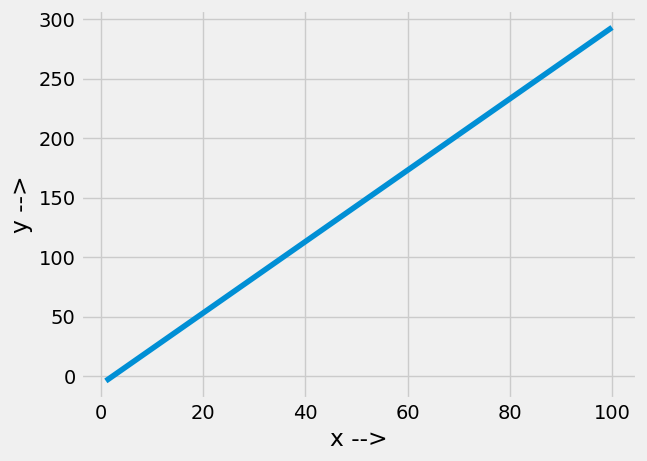

In [918]:
# linear functions
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
x_e = np.linspace(1,100,num=30)
y_e = 3*x_e - 7
ax.plot(x_e,y_e)
ax.set_xlabel("x -->")
ax.set_ylabel("y -->")

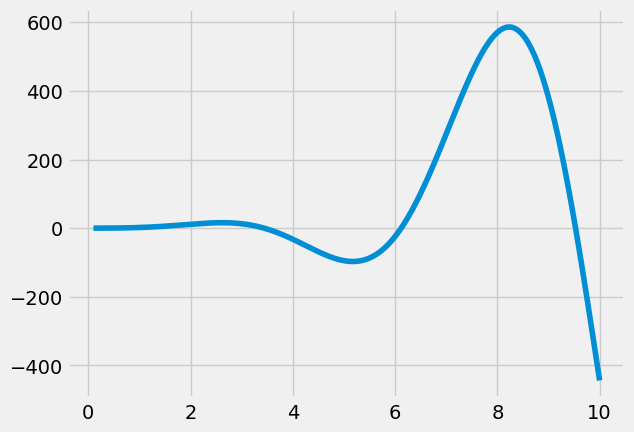

In [927]:
fig,ax=plt.subplots()
ax.plot(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42,shuffle=True)
#fig,ax=plt.subplots()
#ax.plot(X_train,y_train)

In [928]:
act = nn.ReLU()
class Model_simp(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll1 = nn.Linear(in_features=1,out_features=8)
    self.ac1 = act
    self.ll2 = nn.Linear(in_features=8,out_features=32)
    self.ac2 = act
    self.layer_norm = nn.LayerNorm(32)
    self.dropout = nn.Dropout(p=0.1)
    self.ll3 = nn.Linear(in_features=32,out_features=16)
    self.ac3 = act
    self.layer_norm2 = nn.LayerNorm(16)
    self.dropout2 = nn.Dropout(p=0.5)
    self.ll4 = nn.Linear(in_features=16,out_features=16)
    self.ac4 = nn.LeakyReLU()
    self.ll5 = nn.Linear(in_features=16,out_features=4)
    self.ac5 = nn.Tanh()
    self.output = nn.Linear(in_features=4,out_features=1)

  def forward(self,X):
    X = self.ll1(X)
    X = self.ac1(X)
    X = self.ll2(X)
    X = self.ac2(X)
    X = self.layer_norm(X)
    X = self.dropout(X)
    X = self.ll3(X)
    X = self.ac3(X)
    X = self.layer_norm2(X)
    X = self.dropout2(X)
    X = self.ll4(X)
    X = self.ac4(X)
    X = self.ll5(X)
    X = self.ac5(X)
    X = self.output(X)
    return(X)

In [929]:
act = nn.ReLU()
class Model_comp(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll1 = nn.Linear(in_features=1,out_features=8)
    self.ac1 = nn.ReLU()
    self.ll2 = nn.Linear(in_features=8,out_features=16)
    self.ac2 = nn.ReLU()
    self.ll3 = nn.Linear(in_features=16,out_features=16)
    self.ac3 = nn.ReLU()
    self.ll4 = nn.Linear(in_features=16,out_features=4)
    self.ac4 = nn.ReLU()
    self.output = nn.Linear(in_features=4,out_features=1)

  def forward(self,X):
    X = self.ll1(X)
    X = self.ac1(X)
    X = self.ll2(X)
    X = self.ac2(X)
    X = self.ll3(X)
    X = self.ac3(X)
    X = self.ll4(X)
    X = self.ac4(X)
    X = self.output(X)
    return(X)


In [930]:
X_train = torch.from_numpy(X_train).type(torch.float32).unsqueeze(dim=1)
y_train = torch.from_numpy(y_train).type(torch.float32).unsqueeze(dim=1)
X_test = torch.from_numpy(X_test).type(torch.float32).unsqueeze(dim=1)
y_test = torch.from_numpy(y_test).type(torch.float32).unsqueeze(dim=1)

In [931]:
X_train.min(), X_train.max()

(tensor(0.1010), tensor(10.))

In [932]:
# Create a seed
#torch.manual_seed(42)
model = Model_comp()
#model.state_dict()

In [933]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)

In [934]:
model.apply(weights_init)

Model_comp(
  (ll1): Linear(in_features=1, out_features=8, bias=True)
  (ac1): ReLU()
  (ll2): Linear(in_features=8, out_features=16, bias=True)
  (ac2): ReLU()
  (ll3): Linear(in_features=16, out_features=16, bias=True)
  (ac3): ReLU()
  (ll4): Linear(in_features=16, out_features=4, bias=True)
  (ac4): ReLU()
  (output): Linear(in_features=4, out_features=1, bias=True)
)

In [935]:
with torch.inference_mode():
  y_pred1 = model(X_test)

In [937]:
import matplotlib.pyplot as plt
def plot_data(training_data =X_train,
              training_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=None):
  """
  Plots training data and labels in blue and test data and labels in red.
  """
  fig,ax = plt.subplots(figsize=(10,7))
  #ax.scatter(training_data,training_labels,c='b',marker='X',label='training_data')
  ax.scatter(test_data,test_labels,c='r',label='test_data')
  if predictions is not None:
    ax.scatter(test_data,predictions,label='predictions')
  ax.set_xlabel("X")
  ax.set_ylabel("y")
  ax.legend()


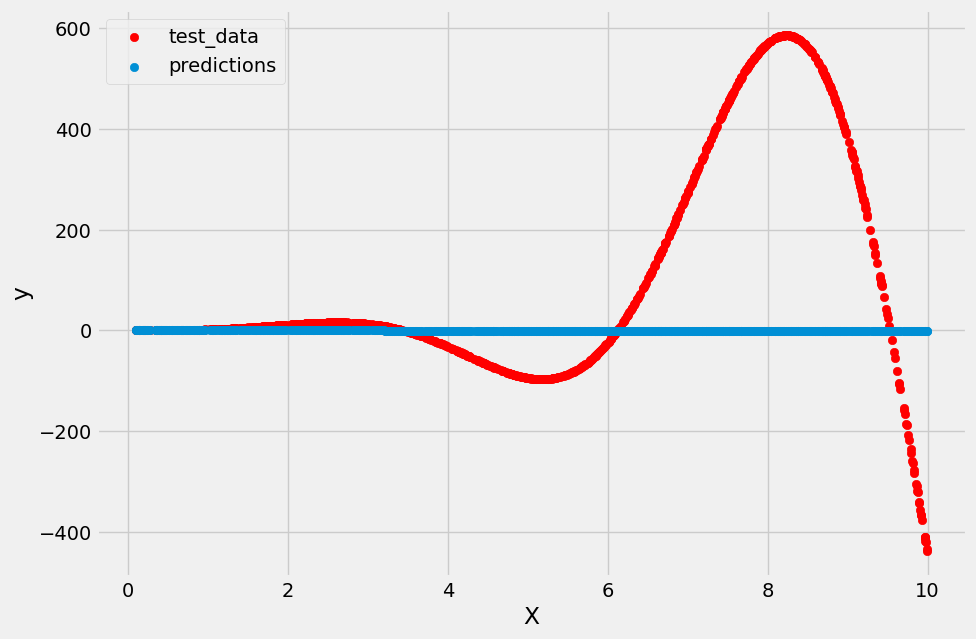

In [938]:
plot_data(predictions=y_pred1)

In [949]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer (SGD and Adam)
optimizer = torch.optim.Adam(params = model.parameters(),
                            lr =0.001) #lr--> leraning rate, very important hyperparameter

In [953]:
# Training loop
epochs = 500
early_stopping_patience = 10
best_loss = float('inf')
epochs_no_improve = 0

for epoch in range(epochs):
  model.train()
  #1. Fwd pass
  y_pred = model(X_train)

  #2. Calculate loss
  loss_train = loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Backward pass
  loss_train.backward()

  #5 Optimizer step
  optimizer.step()



  model.eval()
  with torch.inference_mode():
    y_pred_test = model(X_test)

    loss_test = loss_fn(y_pred_test,y_test)

  if epoch % 50 == 0:
    print(f"epoch:{epoch} | loss_train: {loss_train} | loss_test: {loss_test}")
  # Implement early stopping
  # Early stopping check
    if loss_test < best_loss:
        best_loss = loss_test
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve == early_stopping_patience:
        print(f"Early stopping at epoch {epoch}")
        break



epoch:0 | loss_train: 32.92118835449219 | loss_test: 31.51164436340332
epoch:50 | loss_train: 31.809669494628906 | loss_test: 30.6708984375
epoch:100 | loss_train: 30.779945373535156 | loss_test: 29.711820602416992
epoch:150 | loss_train: 29.761173248291016 | loss_test: 28.844945907592773
epoch:200 | loss_train: 28.32958221435547 | loss_test: 27.736421585083008
epoch:250 | loss_train: 24.890472412109375 | loss_test: 24.377023696899414
epoch:300 | loss_train: 21.553539276123047 | loss_test: 21.171186447143555
epoch:350 | loss_train: 18.542999267578125 | loss_test: 18.29017448425293
epoch:400 | loss_train: 15.881475448608398 | loss_test: 15.616697311401367
epoch:450 | loss_train: 13.353704452514648 | loss_test: 13.095696449279785


In [954]:
with torch.inference_mode():
  y_pred_test_fnl = model(X_test)

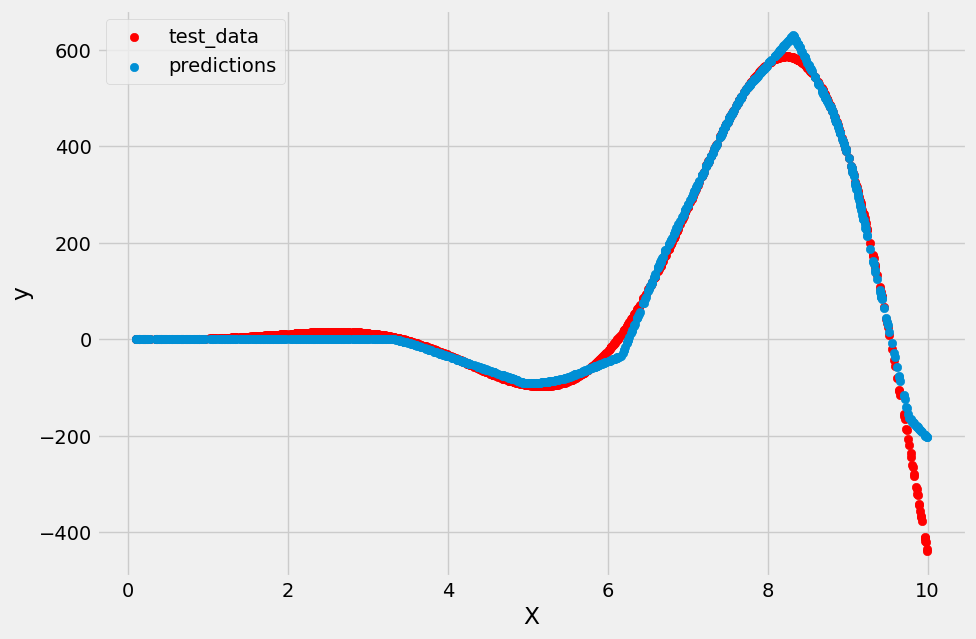

In [955]:
plot_data(predictions=y_pred_test_fnl)

Text(0.5, 1.0, 'Actuals vs Predictions for Non Linear function')

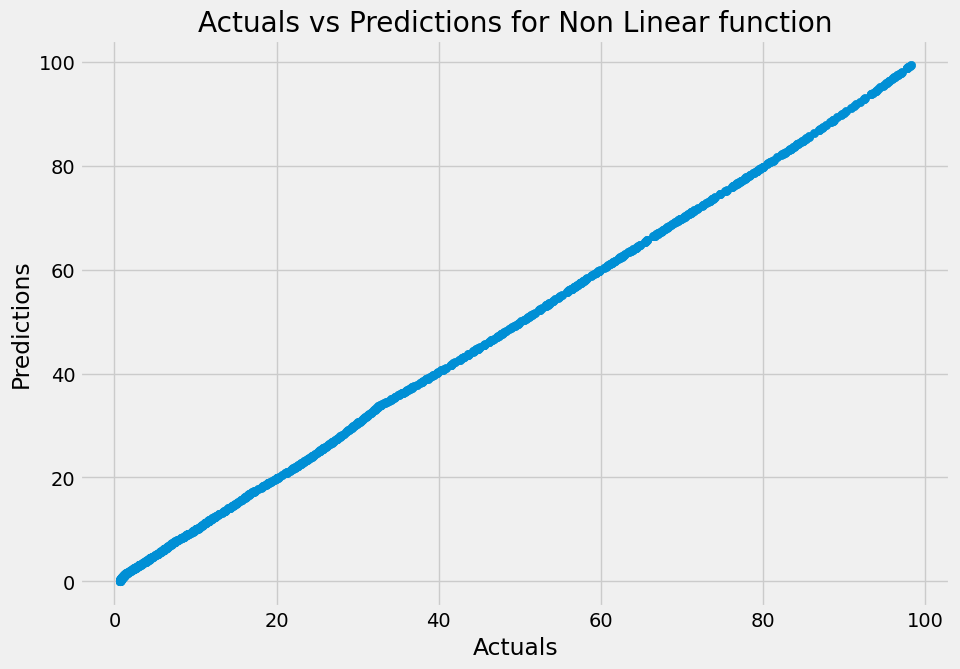

In [916]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(10,7))
ax.scatter(y_pred_test_fnl,y_test)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predictions')
ax.set_title('Actuals vs Predictions for Non Linear function')

In [ ]:
torch.save(model.state_dict(),f="models/model_simple.pth")